In [5]:
#importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [7]:
#Load dataset
df = pd.read_csv('C:/Users/preet/Downloads/Titanic-Dataset.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [9]:
# Select the target variable and useful features
y = df['Survived']
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]


In [11]:
# Convert 'Sex' to numerical values
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])

# Fill missing values in 'Embarked' and encode
X['Embarked'] = X['Embarked'].fillna('S')
X['Embarked'] = LabelEncoder().fit_transform(X['Embarked'])


C:\Users\preet\AppData\Local\Temp\ipykernel_25404\2237122989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = LabelEncoder().fit_transform(X['Sex'])
C:\Users\preet\AppData\Local\Temp\ipykernel_25404\2237122989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].fillna('S')
C:\Users\preet\AppData\Local\Temp\ipykernel_25404\2237122989.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [13]:
# Impute missing 'Age' and 'Fare' values with the median
imputer = SimpleImputer(strategy='median')
X['Age'] = imputer.fit_transform(X[['Age']])
X['Fare'] = imputer.fit_transform(X[['Fare']])


C:\Users\preet\AppData\Local\Temp\ipykernel_25404\1590739947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = imputer.fit_transform(X[['Age']])
C:\Users\preet\AppData\Local\Temp\ipykernel_25404\1590739947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = imputer.fit_transform(X[['Fare']])


In [15]:
#split data into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [17]:
#Build and Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
#make predictions
y_pred = clf.predict(X_test)


In [21]:
#evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:\n', report)


Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [23]:
#Feature importance
feature_importance = clf.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f'{feature}: {importance:.2f}')


Pclass: 0.09
Sex: 0.27
Age: 0.25
SibSp: 0.05
Parch: 0.04
Fare: 0.27
Embarked: 0.03


In [33]:
# Model prediction
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

Confusion Matrix:
[[92 13]
 [19 55]]


Text(120.72222222222221, 0.5, 'Actual')

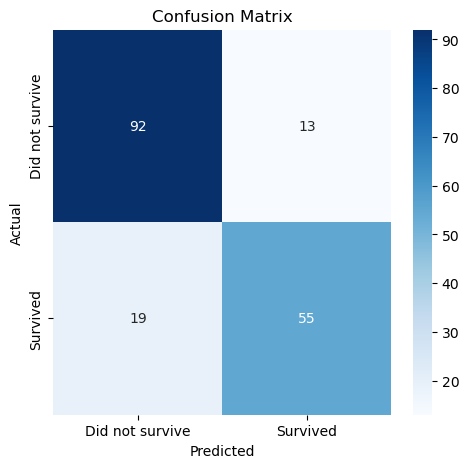

In [35]:
#confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did not survive', 'Survived'],
            yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

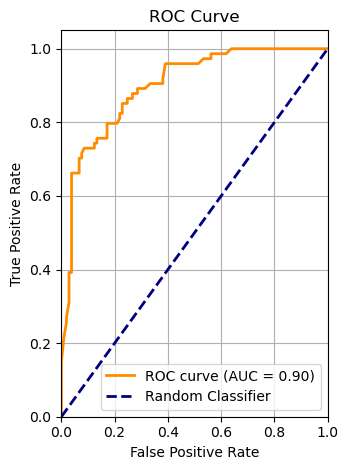


Model Performance Metrics:
Accuracy: 0.8212
ROC-AUC Score: 0.8988

Confusion Matrix Breakdown:
True Negatives (TN): 92
False Positives (FP): 13
False Negatives (FN): 19
True Positives (TP): 55

Additional Metrics:
Precision: 0.8088
Recall (Sensitivity): 0.7432
Specificity: 0.8762
F1-Score: 0.7746


In [37]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.tight_layout()
plt.show()
# Print metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc_score_val = roc_auc_score(y_test, y_pred_proba)
tn, fp, fn, tp = cm.ravel()

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc_score_val:.4f}")

print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Additional metrics
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1_score:.4f}")